In [1]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from brainflow.data_filter import DataFilter, AggOperations, WaveletTypes, NoiseEstimationLevelTypes, WaveletExtensionTypes, ThresholdTypes, WaveletDenoisingTypes
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations, NoiseTypes, DetrendOperations, WindowOperations
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds

In [2]:
mat_contents = sio.loadmat('Data/U001ai.mat')

In [3]:
sorted(mat_contents.keys())
eeg_electrodes = [i.item() for i in mat_contents['info']['label'].item()[0]]

In [4]:
eeg_data = np.array(mat_contents['eeg'])
eeg_data


array([[4194.86747616, 4202.05145052, 4188.71337224, ..., 3931.79      ,
        3931.79      , 3931.79      ],
       [4157.95175738, 4166.66765881, 4162.56605814, ..., 3967.18      ,
        3967.18      , 3967.18      ],
       [4191.28275853, 4200.512336  , 4185.63604028, ..., 3954.36      ,
        3954.36      , 3954.36      ],
       ...,
       [4185.643131  , 4197.95498573, 4200.51360571, ..., 3959.49      ,
        3959.49      , 3959.49      ],
       [4144.60791165, 4154.35659052, 4143.58532296, ..., 3968.2       ,
        3968.2       , 3968.2       ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [5]:
events = mat_contents['events'][:,1]
start_times = np.where(events==32779)[0]
end_times = np.where(events==32780)[0]
print("Finding the index of start and end times")
print(start_times)
print(end_times)

print()
print("Getting the EEG time index of start and end times")
event_index = mat_contents['events'][:,2]
start_index = event_index[start_times]
end_index = event_index[end_times]
print(start_index)
print(end_index)

Finding the index of start and end times
[ 2  5  8 11 14 17 20 23 26 29 32 35]
[ 3  6  9 12 15 18 21 24 27 30 33 36]

Getting the EEG time index of start and end times
[ 1030  2438  3846  5254  6662  8070  9478 10886 12294 13702 15110 16518]
[ 1670  3078  4486  5894  7302  8710 10118 11526 12934 14342 15750 17158]


In [11]:
eeg_epoch = []

for i in range(14):
    DataFilter.perform_bandpass(eeg_data[i], 128, 0.5, 40.0, 2, FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)
    DataFilter.perform_bandstop(eeg_data[i], 128, 58.0, 62.0, 2, FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)


for i in range(len(start_index)):

    # Indexing 0:14 to remove last column (it is not eeg signal, just a status signal)
    eeg_epoch.append(eeg_data[:14, start_index[i]:end_index[i]])

eeg_epoch = np.array(eeg_epoch)
print(eeg_epoch.shape)

(12, 14, 640)


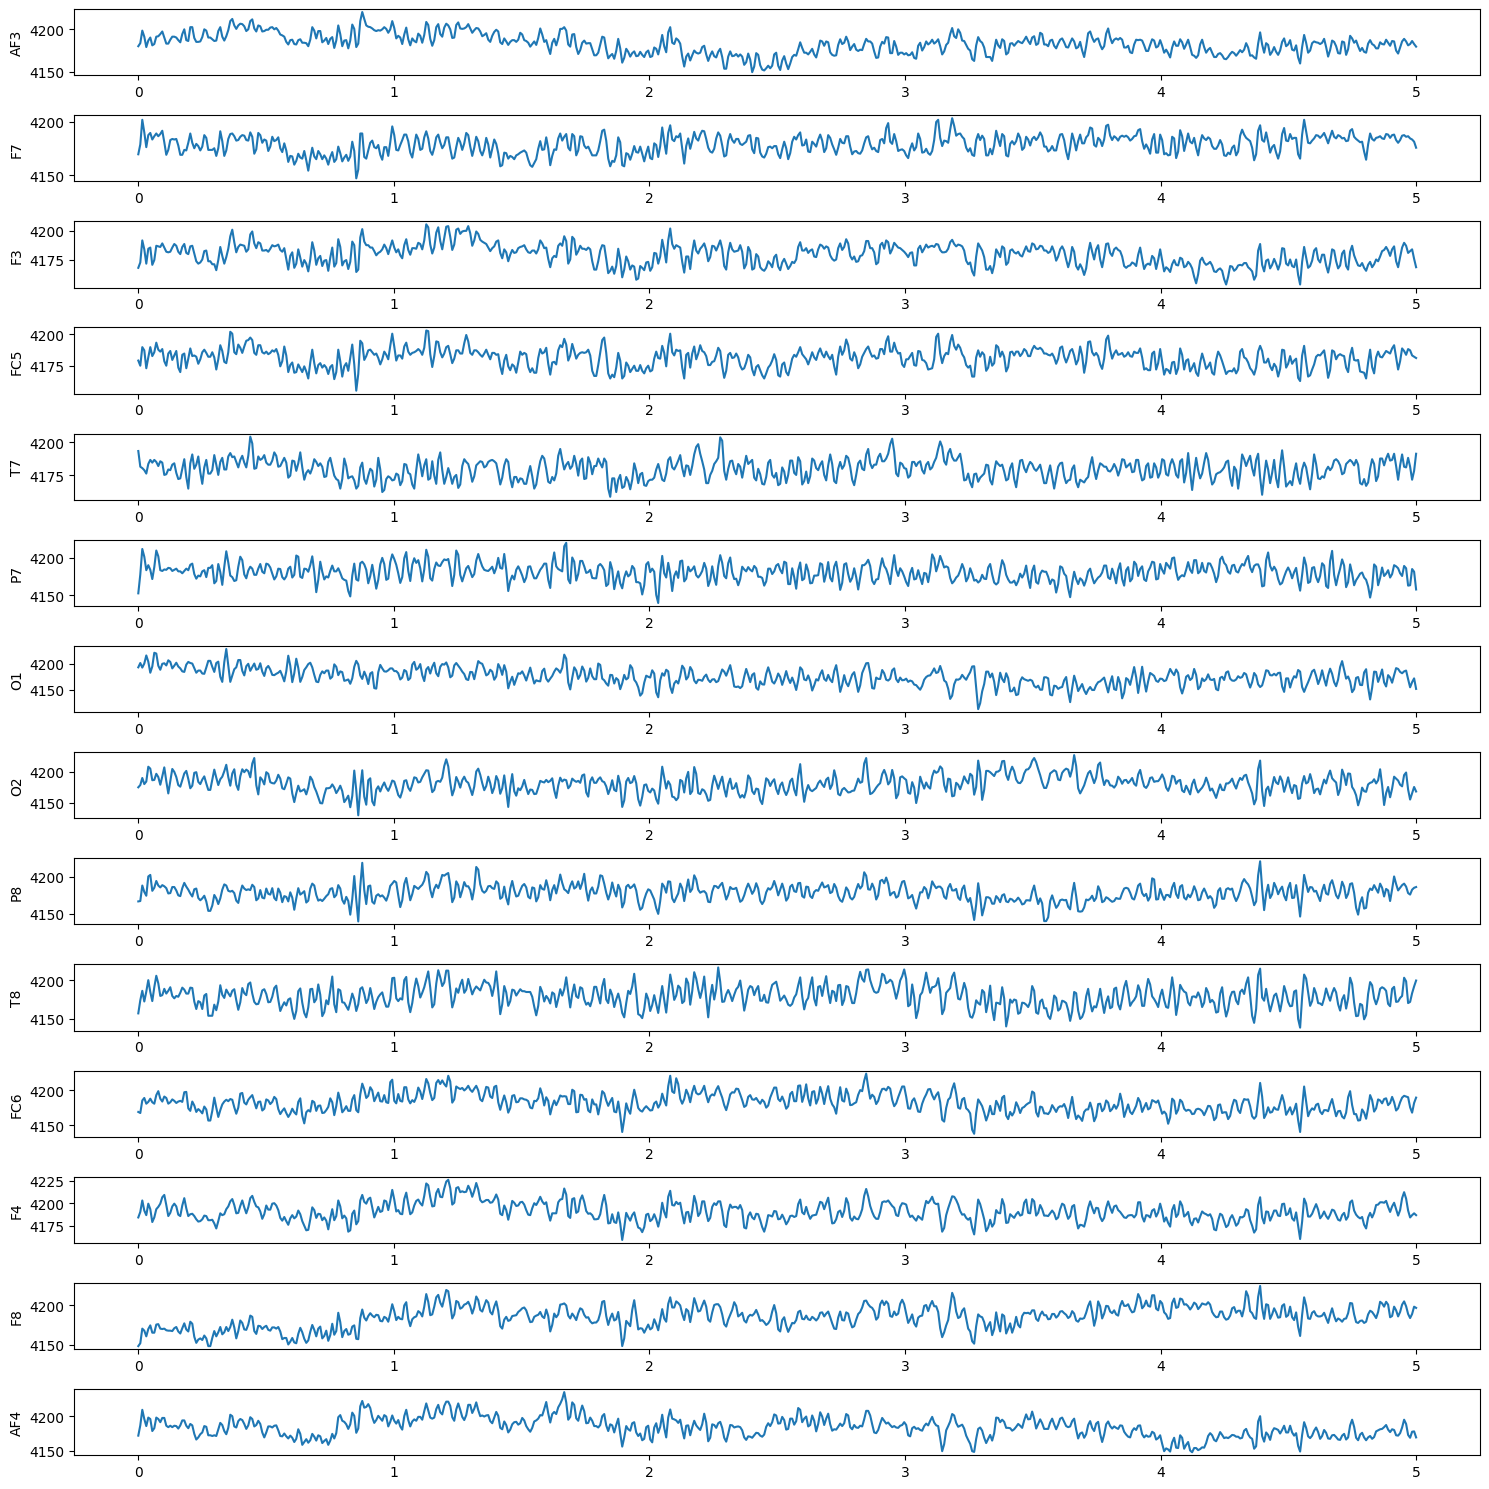

In [20]:
time = np.linspace(0, 5, 640)
fig, axs = plt.subplots(14, 1)
fig.set_figheight(15)
fig.set_figwidth(15)


for i in range(14):
    axs[i].plot(time, eeg_epoch[0][i])
    axs[i].set_ylabel(eeg_electrodes[i])

fig.tight_layout()
plt.show()

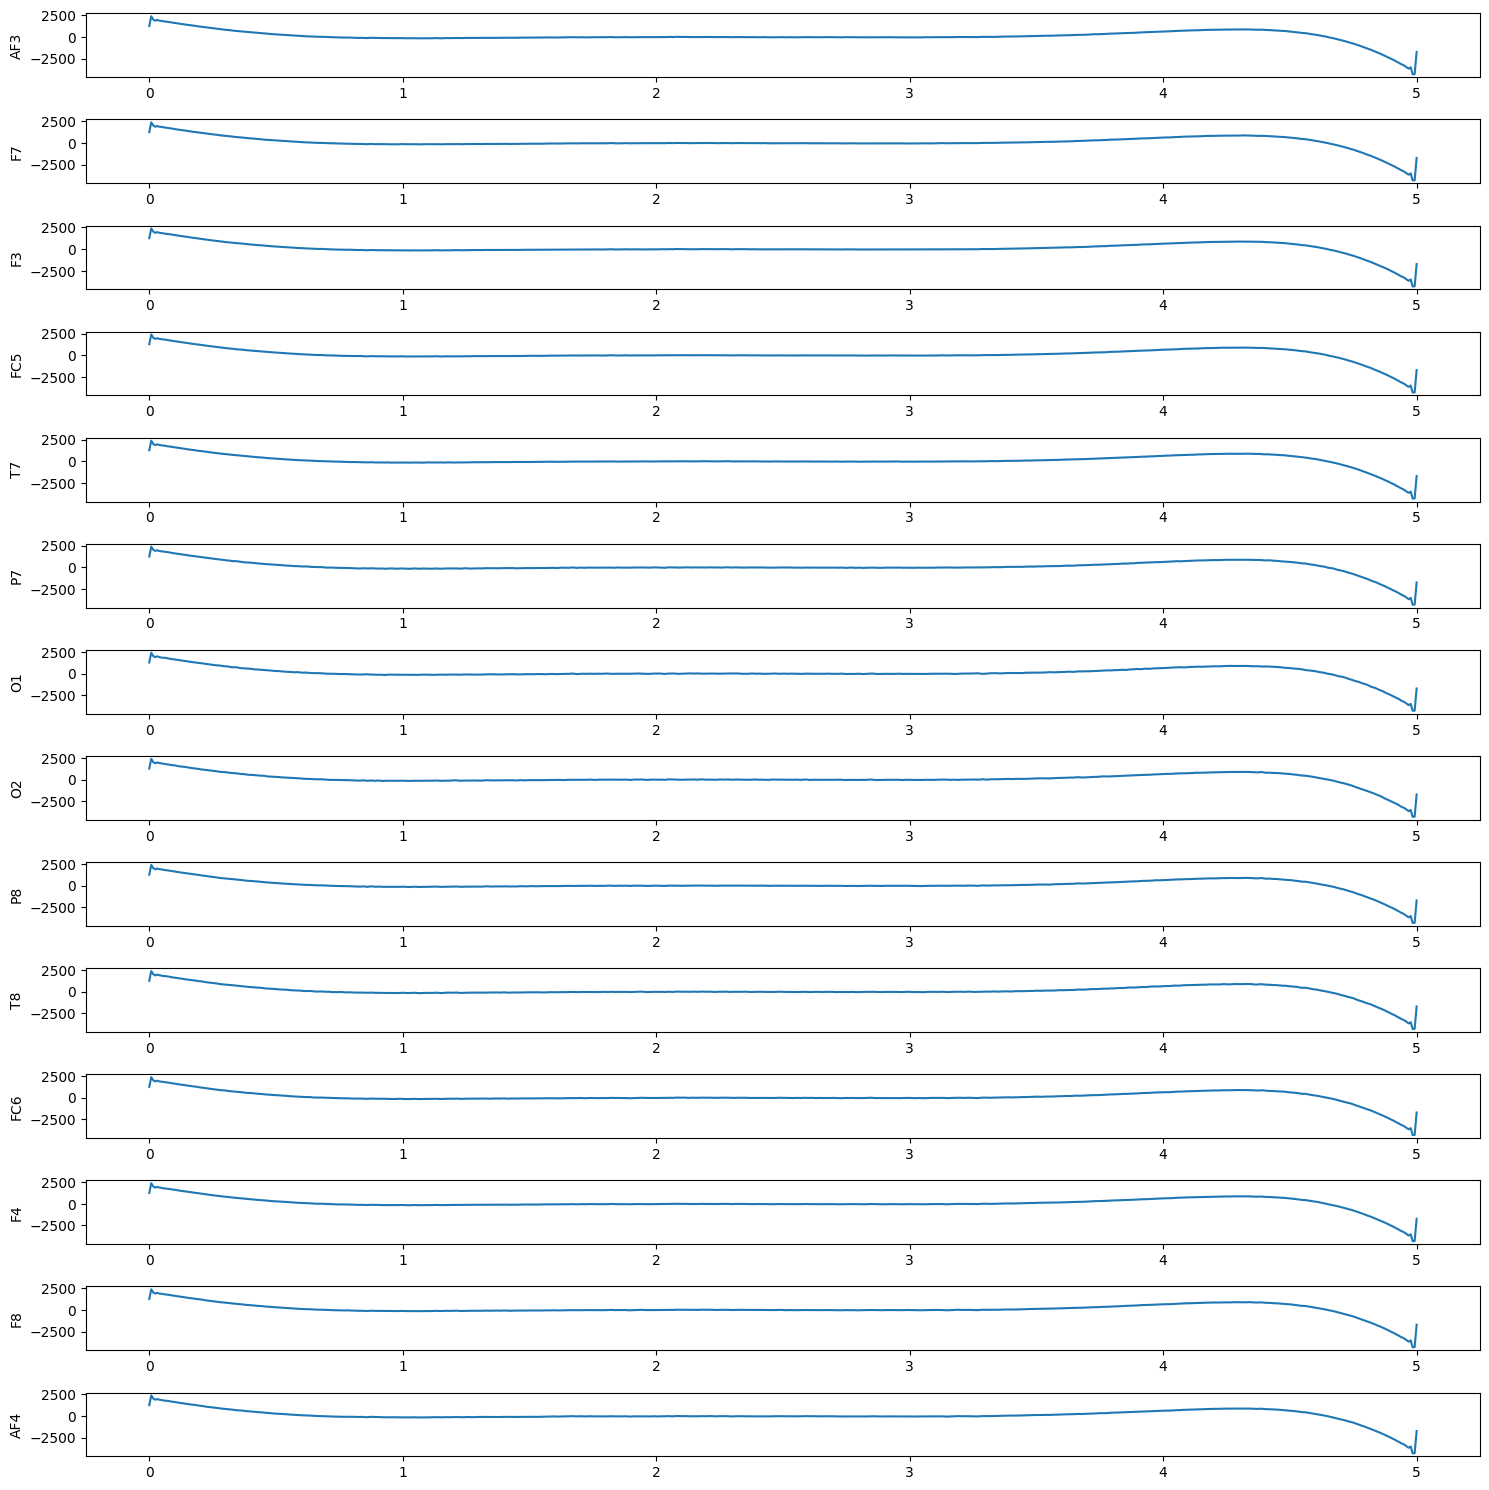

In [29]:
fig, axs = plt.subplots(14, 1)
fig.set_figheight(15)
fig.set_figwidth(15)


for i in range(14):
    axs[i].set_ylabel(eeg_electrodes[i])
    DataFilter.perform_bandpass(eeg_epoch[0][i], 128, 0.5, 40.0, 2, FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)
    DataFilter.perform_bandstop(eeg_epoch[0][i], 128, 58.0, 62.0, 2, FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)

    axs[i].plot(time, eeg_epoch[0][i])

fig.tight_layout()
plt.show()

(1.0, 40.0)

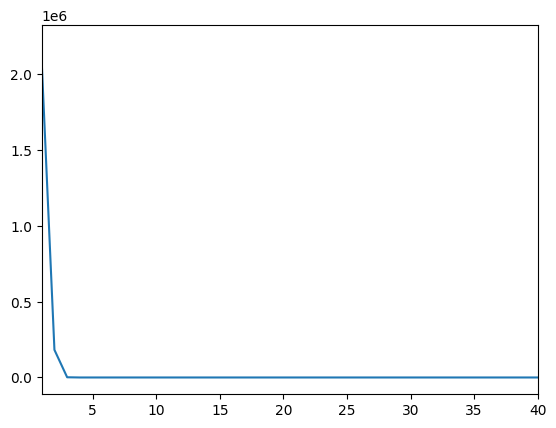

In [27]:
nfft = DataFilter.get_nearest_power_of_two(128)
target_psd_18hz = DataFilter.get_psd_welch(eeg_epoch[0][7], nfft, nfft // 2, 128, WindowOperations.BLACKMAN_HARRIS.value)





plt.plot(target_psd_18hz[1], target_psd_18hz[0])
plt.xlim(1, 40)